# Fish Weight Prediction using dataset

## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
import warnings
warnings.simplefilter('ignore')

## data preprocessing

In [89]:
data = pd.read_csv("fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [90]:
data.shape

(159, 7)

In [91]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### check for null values

In [93]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### including all numerical values in data_num

In [94]:
data_num = [i for i in data.columns if i not in ['Species']]
data_num

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

### visualising distribution of each numerical feature

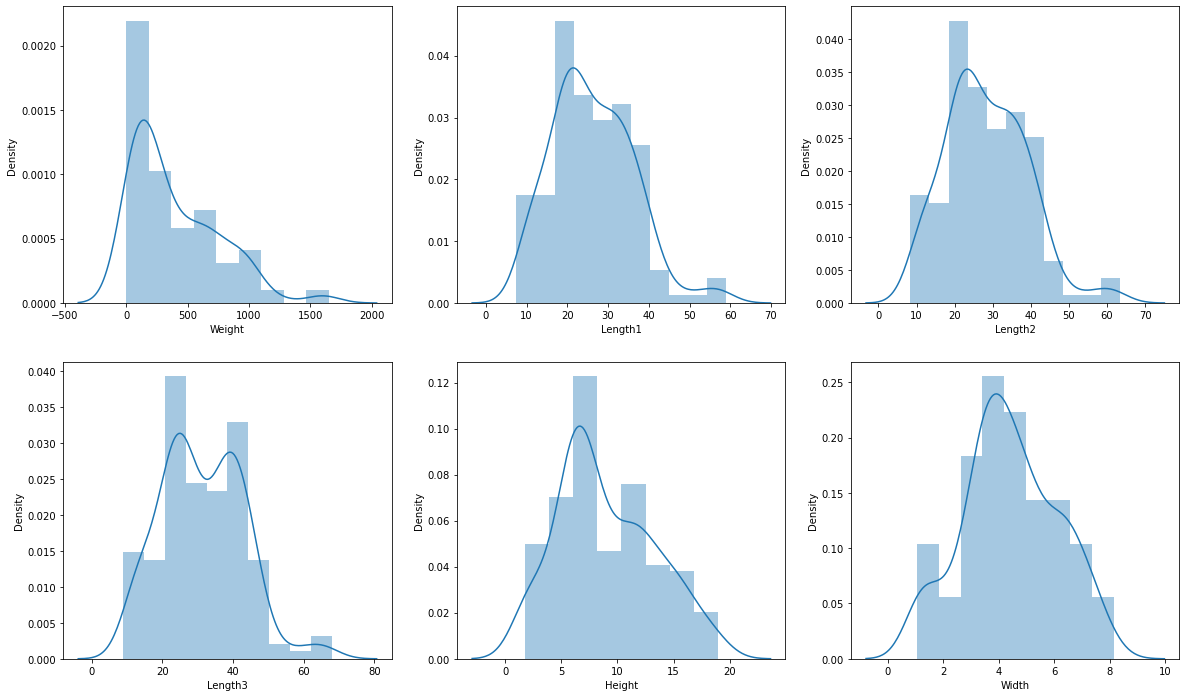

In [95]:
fig = plt.figure(figsize=(20,12))
it = 1
for i in data_num:
    if it<=6:
        ax = plt.subplot(2,3,it)
        sns.distplot(data[i])
        it+=1

### check for collinearity

<AxesSubplot:>

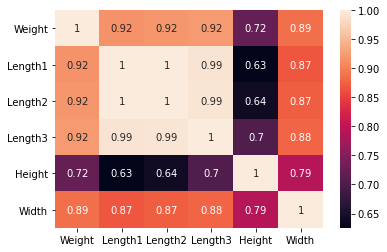

In [96]:
c = data.corr()
sns.heatmap(c,annot=True)

### it is been found that length1,length2 and width are highly correlated with length3, thus it is better to drop them. note that weight is our dependant feature.

In [97]:
data = data.drop(['Length1','Length2','Width'],axis=1)
data.head()

,Species,Weight,Length3,Height
0,Bream,242.0,30.0,11.5200
1,Bream,290.0,31.2,12.4800
2,Bream,340.0,31.1,12.3778
3,Bream,363.0,33.5,12.7300
4,Bream,430.0,34.0,12.4440


<AxesSubplot:>

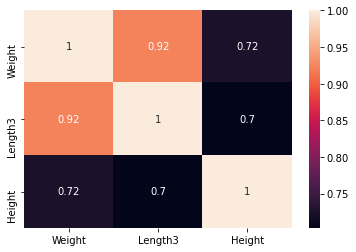

In [98]:
corr = data.corr()
sns.heatmap(corr,annot=True)

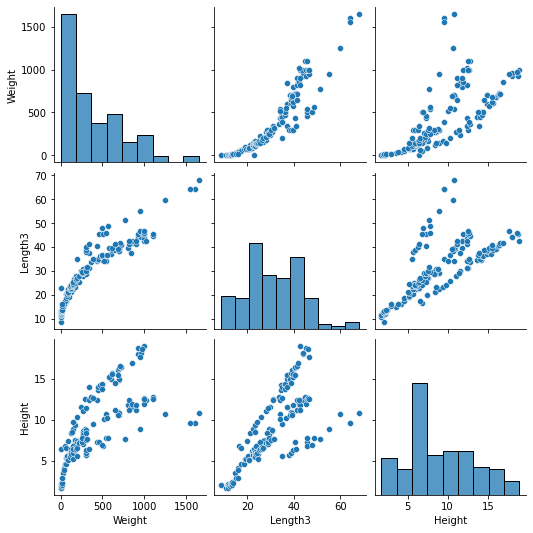

In [99]:
sns.pairplot(data)

### encoding categorical type variable "Species". since there are 7 unique species of fish, let us use label encoding.

In [100]:
data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['Species'])
data['Species'] = le.transform(data['Species'])

In [102]:
data.head()

,Species,Weight,Length3,Height
0,0,242.0,30.0,11.5200
1,0,290.0,31.2,12.4800
2,0,340.0,31.1,12.3778
3,0,363.0,33.5,12.7300
4,0,430.0,34.0,12.4440


### Check for outliers

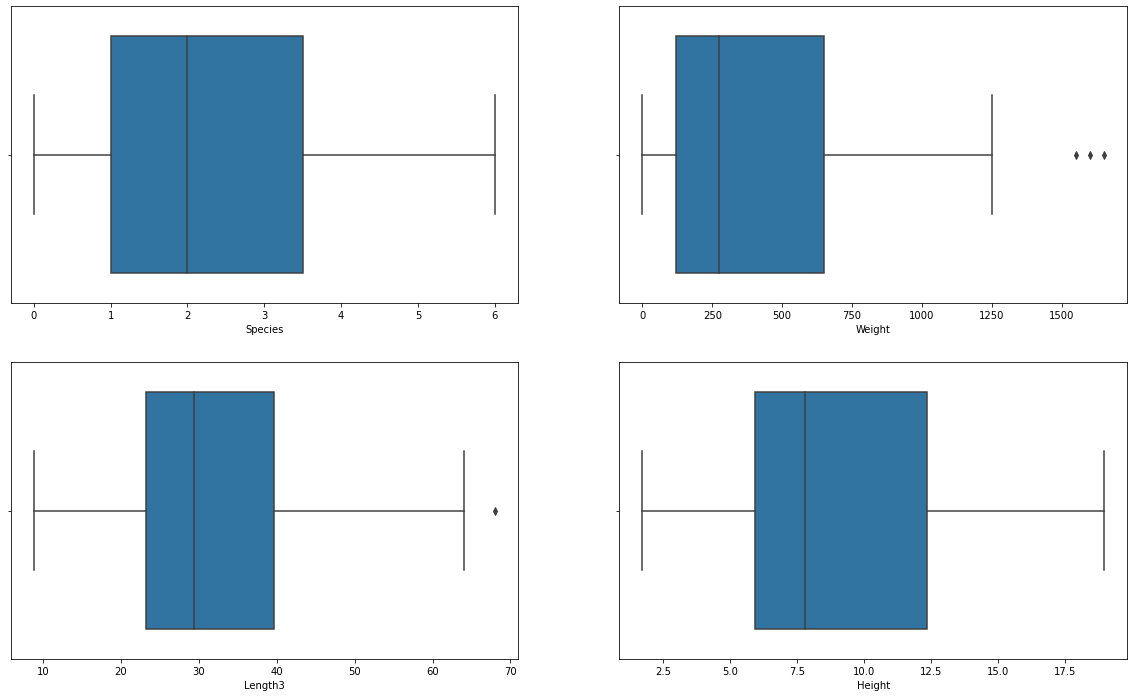

In [103]:
fig = plt.figure(figsize=(20,12))
it = 1
for i in data.columns:
    if it<=4:
        ax = plt.subplot(2,2,it)
        sns.boxplot(data[i])
        it+=1

### It is being found that there are only 4 outliers are present, so it can be ignored

## Model training

In [104]:
x = data.drop('Weight',axis=1)
y = data['Weight']

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=35)

In [107]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [108]:
model.intercept_

-625.9966440778129

In [109]:
model.coef_

array([30.90207713, 22.90218017, 26.44407148])

### model performance evaluation

In [110]:
y_pred = model.predict(x_test)

In [111]:
model.score(x_train,y_train)

0.8713324740290276

### accuracy on train set = 87.13%

In [112]:
r2 = r2_score(y_test,y_pred)
r2

0.8726832711031208

### R<sup>2</sup> Value for model = 87.26%

now let us evaluate adjusted R<sup>2</sup> value

In [113]:
n = data.shape[0]
p = data.shape[1]

In [114]:
adj_r2 = 1- ((1-r2)*(n-1)/(n-p-1))
adj_r2

0.8693763430798253

### Adjusted R<sup>2</sup> value = 86.93 %

## calculating other metrics

In [115]:
np.sqrt(mean_squared_error(y_test,y_pred))

132.48073365348864

In [116]:
mean_absolute_error(y_test,y_pred)

101.90534152698115

### saving model

In [119]:
import pickle
pickle.dump(model,open('fish_trained.p','wb'))